In [2]:
import sympy as sym

In [3]:
# Define the Gumbel distribution using SymPy

x, beta, mu = sym.symbols('x beta mu')
#F_gumbel = YOUR CODE HERE
# solution
F_gumbel = sym.exp(-sym.exp(-(x-mu)/beta))
display(F_gumbel)

exp(-exp((mu - x)/beta))

In [6]:
# Invert the Gumbel distribution using SymPy to find x ~ non-exceedence probability, beta, mu as done in the workshop by hand
Prob_non_exc = sym.symbols('Prob_non_exc')
#YOUR CODE HERE
#x_sol = YOUR CODE HERE

# solution
Prob_non_exc = sym.symbols('Prob_non_exc')
eq1 = sym.Eq(Prob_non_exc,F_gumbel)
display(eq1)
x_sol = sym.solve(eq1, x)[0]

display(x_sol)

Eq(Prob_non_exc, exp(-exp((mu - x)/beta)))

-beta*log(exp(-mu/beta)*log(1/Prob_non_exc))

In [7]:
# Evaluate your inverted Gumbel distribution using SymPy for the min, 0.25, 0.5, 0.75 and max non-exceedence probabilities as done in the workshop by hand
# You should find:
#3.353
#23.89
#32.97
#44.48
#115.3

Prob_non_exc_list = [1/773, 0.25, 0.5, 0.75, 772/773]
for i in range(len(Prob_non_exc_list)):
    display(x_sol.subs({beta:13.097, mu:28.167, Prob_non_exc:Prob_non_exc_list[i]}))

3.35265348709722

23.8890710970645

32.9672197208581

44.4845434425937

115.257228589970

In [8]:
# Use SymPy to find the probability density function of the Gumbel distribution, is it equal to the function you found in the book?
#f_gumbel = YOUR CODE HERE

# solution
f_gumbel = sym.diff(F_gumbel, x)
display(f_gumbel)

exp((mu - x)/beta)*exp(-exp((mu - x)/beta))/beta

Define the Piecewise equation from PA 1.7 in SymPy (hint, see https://docs.sympy.org/latest/modules/functions/elementary.html#piecewise)

$$\begin{equation}
f(x)=
    \begin{cases}
        0.1 & \text{if } 0 < x < 3.6 \\
        2(x-5) &  5 < x < 5.8 \\
        0 & \text{elsewhere}
    \end{cases}
\end{equation}$$

Use the provided function to plot it for $-1<x<6$

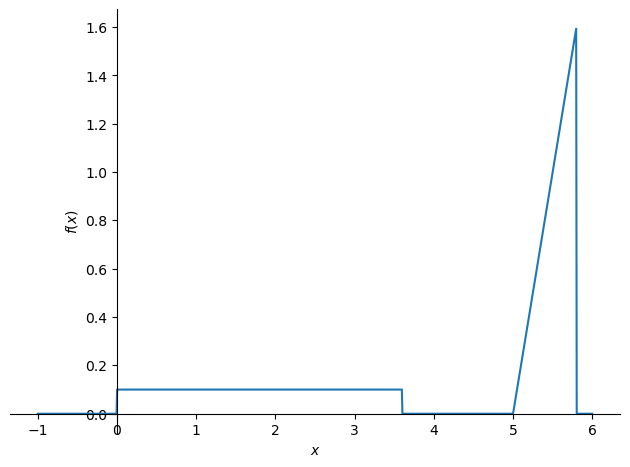

In [9]:
#f = YOUR CODE HERE
#sym.plot(f,(x,-1,6));

#solutionS
f = sym.Piecewise((0, x< 0), (0.1 , x < 3.6), (0, x < 5), (2*(x-5),x<5.8), (0, True))
sym.plot(f, (x,-1,6));

-0.1*Min(0, x) + 0.1*Min(3.6, x) - Min(5, x)**2 + 10*Min(5, x) + Min(5.8, x)**2 - 10*Min(5.8, x)

Piecewise((1.0, x >= 5.8), (x**2 - 10*x + 25.36, x >= 5), (0.36, x >= 3.6), (0.1*x, x >= 0), (0, True))

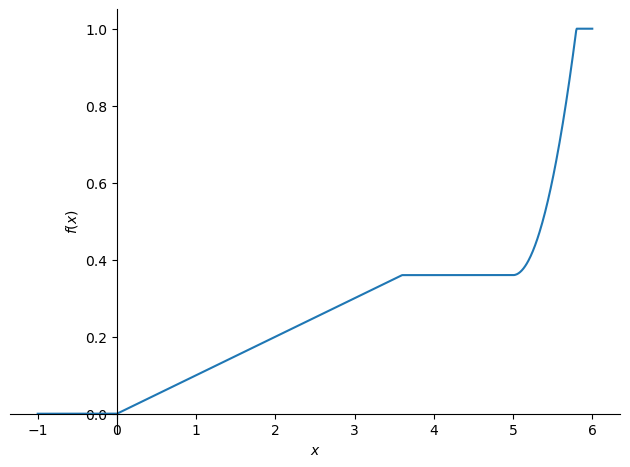

In [11]:
# Integrate the piecewise probability density function to find the cumulative distribution function as done numerically in PA1.7
x = sym.symbols('x')
#F = YOUR CODE HERE
#sym.plot(F, (x,-1,6));

# solution
F = sym.integrate(f, (x,-sym.oo,x))
#or
#F = sym.integrate(f,x)
display(F)
display(F.rewrite(sym.Piecewise).simplify())
sym.plot(F, (x,-1,6));

Checks

In [12]:
import numpy as np
assert sym.simplify(F_gumbel - sym.exp(-sym.exp((mu - x)/beta))) == 0 , 'Error: Gumbel distribution is not correct'
assert sym.simplify(x_sol + beta*sym.log(sym.exp(-mu/beta)*sym.log(1/Prob_non_exc))) == 0, 'Error: inverted Gumbel distribution is not correct'
assert sym.simplify(f_gumbel - sym.exp(-((x-mu)/beta+sym.exp(-(x-mu)/beta)))/beta) == 0, 'Error: probability densily function is not correct'
assert np.allclose(np.array([0.        , 0.        , 0.05555556, 0.13333333, 0.21111111,       0.28888889, 0.36      , 0.36      , 0.40938272, 1.        ]), sym.lambdify(x, F.rewrite(sym.Piecewise).simplify())(np.linspace(-1,6,10))), 'Error: Piecewise cumulative distribution function is not correct'